#Import Google Drive

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Librairy import

In [123]:
# MNE Librayry https://mne.tools/stable/auto_tutorials/intro/10_overview.html#sphx-glr-auto-tutorials-intro-10-overview-pyimport mne
!pip install mne
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import numpy as np
import pandas as pd
import mne
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.utils.data import DataLoader, TensorDataset

#We plot some statistics on the dataset

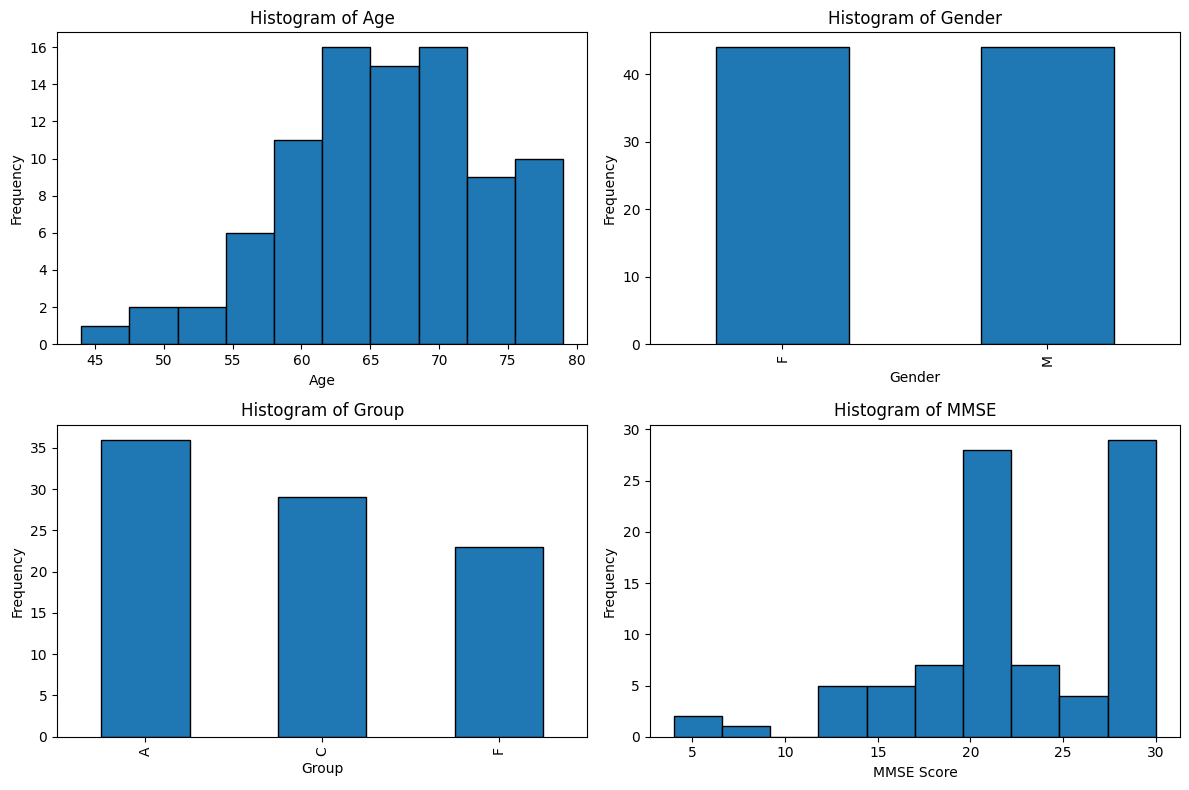

In [114]:
# On va chercher les données des participans pour des stats
path_dataset = "/content/drive/MyDrive/MSLP/Project/Projet_Session-EEG-Alza/"
participants_data = pd.read_csv(path_dataset+"participants.tsv", sep='\t')
participants_data.head()

# Histogramme des Age
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(participants_data['Age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Histogramme des genres
plt.subplot(2, 2, 2)
participants_data['Gender'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Histogram of Gender')

# Histogramme des groupe A C F
plt.subplot(2, 2, 3)
participants_data['Group'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.title('Histogram of Group')

# Histogramme MMSE
plt.subplot(2, 2, 4)
plt.hist(participants_data['MMSE'], bins=10, edgecolor='black')
plt.xlabel('MMSE Score')
plt.ylabel('Frequency')
plt.title('Histogram of MMSE')

plt.tight_layout()
plt.show()

Creation of the binary class for our first step to classify abnormal and normal EEG. Normal is 0 and abnormal is 1

In [331]:
participants_data['Class_norm_anorm']= participants_data['Group'].replace({'C': 0, 'A': 1, 'F': 1})

<ipython-input-331-9bd996073b3b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  participants_data['Class_norm_anorm']= participants_data['Group'].replace({'C': 0, 'A': 1, 'F': 1})


Loading the data for processing

In [116]:
# Importation des données faire des test
import pandas as pd
liste_de_rats = []
path_dataset = "/content/drive/MyDrive/MSLP/Project/Projet_Session-EEG-Alza/derivatives/"
# raw_path = path_dataset + "/sub-001/eeg/sub-001_task-eyesclosed_eeg.set"
# get all eeg
files = os.listdir(path_dataset)
for i, fl in enumerate(files):
  print(f'file {fl}')
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)

  # canal et  temps
  data, times = raw.get_data(return_times=True)
  channels = raw.ch_names

  # Créer un DataFrame pandas
  df = pd.DataFrame(data.T, columns=channels)  #(n_times, n_channels)
  df['time'] = times  # Ajout du temps
  liste_de_rats.append(df)


file sub-037
file sub-018


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-028
file sub-032


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-034


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-079
file sub-076
file sub-085
file sub-017


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-039


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-044
file sub-055
file sub-050


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-025
file sub-031


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-021


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-051
file sub-063


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-047
file sub-048


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-046
file sub-059


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-066
file sub-012


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-014


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-060
file sub-008


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-010


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-086
file sub-072


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-011
file sub-077


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-026


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-069


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-029


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-054


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-075


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-019


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-064


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-016


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-035
file sub-022


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-024
file sub-001
file sub-082
file sub-006


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-058
file sub-007


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-074


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-030
file sub-087


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-013
file sub-052


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-005
file sub-041


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-073
file sub-061


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-038


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-057
file sub-053


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-081


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-036
file sub-084


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-071
file sub-020


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-004
file sub-040


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-002
file sub-080


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-043
file sub-068


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-003
file sub-088


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-042


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-070
file sub-027


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-078


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-056
file sub-015


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-045


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-049
file sub-009


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-065
file sub-067
file sub-023


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)
<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


file sub-062
file sub-083
file sub-033


<ipython-input-116-9d8bfa67569d>:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path_dataset+fl+"/eeg/"+fl+"_task-eyesclosed_eeg.set",preload=True)


Declaration of the EEGDataset class for processing of data for the dataloader.

In [332]:
labels = torch.tensor(participants_data['Class_norm_anorm'],dtype=torch.long)


max_rows = max(df.shape[0] for df in liste_de_rats)
max_cols = liste_de_rats[0].shape[1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Class for creating the dataset
class EEGDataset(torch.utils.data.Dataset):
    def __init__(self, dataframes, max_rows, max_cols,noise_std=0.015):
        self.dataframes = dataframes
        self.max_rows = max_rows
        self.max_cols = max_cols
        self.noise_std = noise_std

    def __len__(self):
        return len(self.dataframes)

    def __getitem__(self, idx):
        df = self.dataframes[idx]
        array = df.values
        padded_array = np.pad(
            array,
            pad_width=((0, self.max_rows - array.shape[0]), (0, self.max_cols - array.shape[1])),
            mode='constant',
            constant_values=0
        )
        noise = np.random.normal(0, self.noise_std, padded_array.shape)
        noisy_array = padded_array + noise
        tensor = torch.tensor(noisy_array, dtype=torch.float32)

        return tensor


#Implementation of a CNN classifier for classifying our binary classes

In [333]:
#Class for EEG CNN classifier
class EEGClassifier(nn.Module):
    def __init__(self, num_channels, max_rows,num_classes):
        super(EEGClassifier, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=num_channels, out_channels=32, kernel_size=8, stride=4)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=4, stride=2)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=4, stride=2)
        self.maxpool = nn.MaxPool1d(2)

        self.fc1 = None
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.maxpool(x)
        x = torch.relu(self.conv2(x))
        x = self.maxpool(x)
        x = torch.relu(self.conv3(x))
        x = self.maxpool(x)

        if self.fc1 is None:
            in_features = x.view(x.size(0), -1).size(1)
            self.fc1 = nn.Linear(in_features, 128).to(x.device)

        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


#Implementation of a GMM Dataset and feature extraction function

In [336]:
labels = torch.tensor(participants_data['Class_norm_anorm'].values, dtype=torch.long)

max_rows = max(df.shape[0] for df in liste_de_rats)
max_cols = liste_de_rats[0].shape[1]

#Class for the GMM classifier
class EEGDatasetGMM(torch.utils.data.Dataset):
    def __init__(self, dataframes, labels, max_rows, max_cols,noise_std=0.01):
        min_length = min(len(dataframes), len(labels))
        self.dataframes = dataframes[:min_length]
        self.labels = labels[:min_length]
        self.max_rows = max_rows
        self.max_cols = max_cols
        self.noise_std = noise_std

    def __len__(self):
        return len(self.dataframes)

    def __getitem__(self, idx):
        df = self.dataframes[idx]
        array = df.values
        padded_array = np.pad(
            array,
            pad_width=((0, self.max_rows - array.shape[0]), (0, self.max_cols - array.shape[1])),
            mode='constant',
            constant_values=0
        )

        noise = np.random.normal(0, self.noise_std, padded_array.shape)
        noisy_array = padded_array + noise

        tensor = torch.tensor(noisy_array, dtype=torch.float32)
        label = self.labels[idx]
        return tensor, label

#Dataset declaration
dataset = EEGDatasetGMM(liste_de_rats, labels, max_rows, max_cols)

train_size = int(0.75 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

#Dataloader declaration
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)


def extract_features(dataloader):
    features = []
    labels = []
    for data, label in dataloader:
        mean_features = data.mean(dim=1).squeeze().numpy()
        var_features = data.var(dim=1).squeeze().numpy()
        feature_vector = np.concatenate([mean_features, var_features], axis=-1)
        features.append(feature_vector)
        labels.append(label.item())
    return np.array(features), np.array(labels)

In [337]:
#Prepare the dataset for training
X_train, y_train = extract_features(train_loader)
X_test, y_test = extract_features(test_loader)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(
    TensorDataset(X_train, y_train),
    batch_size=8,
    pin_memory=True
)


test_loader = DataLoader(
    TensorDataset(X_test, y_test),
    batch_size=8,
    shuffle=False
)

Training and testing on the GMM classifier

In [338]:
#Declaring the models
gmm_normal = GaussianMixture(n_components=19, random_state=42)
gmm_abnormal = GaussianMixture(n_components=19, random_state=42)
#Fitting the models
gmm_normal.fit(X_train[y_train == 0])
gmm_abnormal.fit(X_train[y_train == 1])


def predict_gmm(X, gmm_normal, gmm_abnormal):
    log_likelihood_normal = gmm_normal.score_samples(X)
    log_likelihood_abnormal = gmm_abnormal.score_samples(X)
    return np.where(log_likelihood_normal > log_likelihood_abnormal, 0, 1)

#Prediction
y_pred_train = predict_gmm(X_train, gmm_normal, gmm_abnormal)
y_pred_test = predict_gmm(X_test, gmm_normal, gmm_abnormal)


accuracy = accuracy_score(y_train.numpy(), y_pred_train)
print(f"Accuracy train: {accuracy * 100:.2f}%")
print("Classification Report train:")
print(classification_report(y_train, y_pred_train))
accuracy = accuracy_score(y_test.numpy(), y_pred_test)
print(f"Accuracy test: {accuracy * 100:.2f}%")
print("Classification Report test:")
print(classification_report(y_test, y_pred_test))

Accuracy train: 100.00%
Classification Report train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        44

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66

Accuracy test: 63.64%
Classification Report test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.67      0.93      0.78        15

    accuracy                           0.64        22
   macro avg       0.33      0.47      0.39        22
weighted avg       0.45      0.64      0.53        22



Metrics calculation training set

In [339]:
accuracy = accuracy_score(y_train.numpy(), y_pred_train)
precision = precision_score(y_train.numpy(), y_pred_train)
recall = recall_score(y_train.numpy(), y_pred_train)
specificity = recall_score(y_train.numpy(), y_pred_train,pos_label=0)
f1 = f1_score(y_train.numpy(), y_pred_train)

In [340]:
print('Metrics Training set')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

Metrics Training set
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Specificity: 1.00


Metrics calculaiton test set

In [341]:
accuracy = accuracy_score(y_test.numpy(), y_pred_test)
precision = precision_score(y_test.numpy(), y_pred_test)
recall = recall_score(y_test.numpy(), y_pred_test)
specificity = recall_score(y_test.numpy(), y_pred_test,pos_label=0)
f1 = f1_score(y_test.numpy(), y_pred_test)

In [342]:
print('Metrics Test set')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

Metrics Test set
Accuracy: 0.64
Precision: 0.67
Recall: 0.93
F1-Score: 0.78
Specificity: 0.00


Confusion matrix on training set

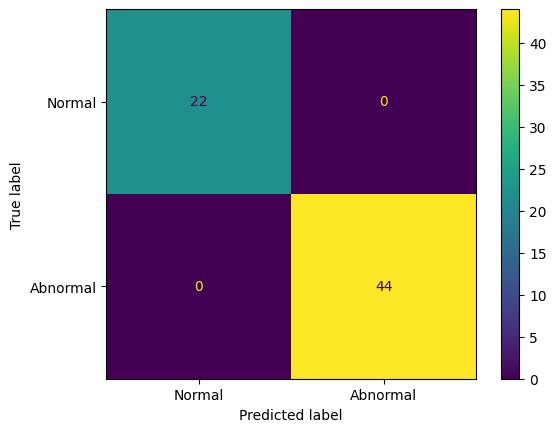

In [343]:
cm = confusion_matrix(y_train, y_pred_train, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Normal','Abnormal'])
disp.plot()
plt.show()

Confusion matrix on test set

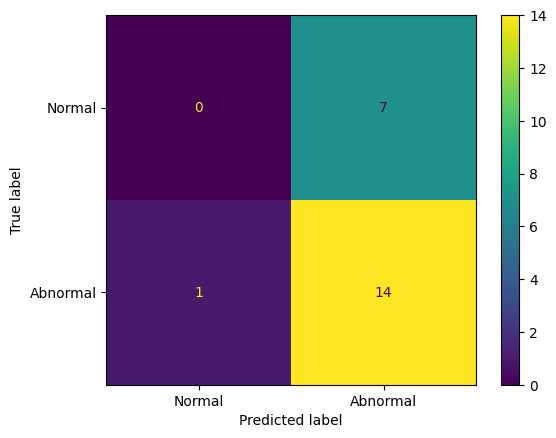

In [344]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Normal','Abnormal'])
disp.plot()
plt.show()

Data preparation for CNN classifier

In [345]:
#Loading the dataset with our class
dataset = EEGDataset(liste_de_rats, max_rows, max_cols,0.01)
X = np.array([dataset[i].numpy() for i in range(len(dataset))])

In [346]:
#Scaling the data
X = X[:, :, :-1]
X = X.reshape(X.shape[0], 19, -1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(X.shape[0], -1))

Splitting the data and implementing the dataloader

In [348]:
#Preparing the dataloader
dataset_scaled = X_scaled.reshape(X.shape[0], 19, -1)

labels = torch.tensor(participants_data['Class_norm_anorm'][:len(dataset_scaled)], dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(dataset_scaled, labels, test_size=0.25, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(
    TensorDataset(X_train, y_train),
    batch_size=8,
    pin_memory=True
)


test_loader = DataLoader(
    TensorDataset(X_test, y_test),
    batch_size=8,
    shuffle=False
)

<ipython-input-348-88bd5648016f>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
<ipython-input-348-88bd5648016f>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)


Training loop on training data with CNN classifier and cross-entropy + dtw loss

In [349]:
import pickle
torch.cuda.empty_cache()
max_rows = max(df.shape[0] for df in liste_de_rats)
num_channels = 19
freq_bins = 64
time_frames = 32
num_classes = 2
device = torch.device("cpu")
def squared_euclidean(x, y):
    return torch.cdist(x, y, p=2) ** 2
# save the model to disk
#filename = '/content/drive/MyDrive/CNN_50E_model.pkl'
#model = pickle.load(open(filename, 'rb'))
model = EEGClassifier(num_channels=num_channels, max_rows=max_rows, num_classes=num_classes)
model=model.to(device)

#Calculation of class weights for loss function
class_counts = np.bincount(y_train.numpy())
print(f"Class counts: {class_counts}")

total_samples = len(y_train)
class_weights = [total_samples / count for count in class_counts]
print(f"Class weights (unnormalized): {class_weights}")

class_weights = [weight / sum(class_weights) for weight in class_weights]
print(f"Normalized class weights: {class_weights}")

class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
all_loss = []
model.train()
all_accuracy = []
all_precision = []
all_recall = []
all_specificity = []
all_f1 = []

for epoch in range(num_epochs):
    running_loss = 0.0
    temp_loss = []
    y_true_train = []
    y_pred_train = []
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        inputs = inputs.to(device)
        labels = labels.to(device)


        target = torch.ones_like(inputs).to(device)

        sdtw_loss = []
        for i in range(inputs.size(0)):
            sdtw = pysdtw.SoftDTW(gamma=1.0, dist_func=squared_euclidean, use_cuda=False)
            sample_input = inputs[i].unsqueeze(0).cpu()
            sample_target = target[i].unsqueeze(0).cpu()
            sdtw_result = sdtw(sample_input, sample_target)
            sdtw_loss.append(sdtw_result.clone().detach().to(device))

        sdtw_loss = torch.stack(sdtw_loss).mean()

        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)+0.50*sdtw_loss
        _, predicted = torch.max(outputs, 1)
        y_true_train.extend(labels.cpu().numpy())
        y_pred_train.extend(predicted.cpu().numpy())
        # Backward pass
        loss.backward()
        optimizer.step()
        temp_loss.append(loss.item())
        running_loss += loss.item()

    all_accuracy.append(accuracy_score(y_true_train, y_pred_train))
    all_precision.append(precision_score(y_true_train, y_pred_train))
    all_recall.append(recall_score(y_true_train, y_pred_train))
    all_f1.append(f1_score(y_true_train, y_pred_train))
    all_specificity.append(recall_score(y_true_train, y_pred_train,pos_label=0))
    all_loss.append(np.mean(temp_loss))

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

Class counts: [26 40]
Class weights (unnormalized): [2.5384615384615383, 1.65]
Normalized class weights: [0.606060606060606, 0.3939393939393939]
Epoch [1/20], Loss: 12173391.8889
Epoch [2/20], Loss: 12173391.8889
Epoch [3/20], Loss: 12173391.8889
Epoch [4/20], Loss: 12173391.7778
Epoch [5/20], Loss: 12173391.7778
Epoch [6/20], Loss: 12173391.1111
Epoch [7/20], Loss: 12173390.8889
Epoch [8/20], Loss: 12173390.8889
Epoch [9/20], Loss: 12173390.8889
Epoch [10/20], Loss: 12173390.8889
Epoch [11/20], Loss: 12173390.8889
Epoch [12/20], Loss: 12173390.8889
Epoch [13/20], Loss: 12173390.8889
Epoch [14/20], Loss: 12173390.8889
Epoch [15/20], Loss: 12173390.8889
Epoch [16/20], Loss: 12173390.8889
Epoch [17/20], Loss: 12173390.8889
Epoch [18/20], Loss: 12173390.8889
Epoch [19/20], Loss: 12173390.8889
Epoch [20/20], Loss: 12173390.8889


In [350]:
import pickle
# save the model to disk
filename = '/content/drive/MyDrive/CNN_STFT_20E_model.pkl'
pickle.dump(model, open(filename, 'wb'))


In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

Plotting the metrics

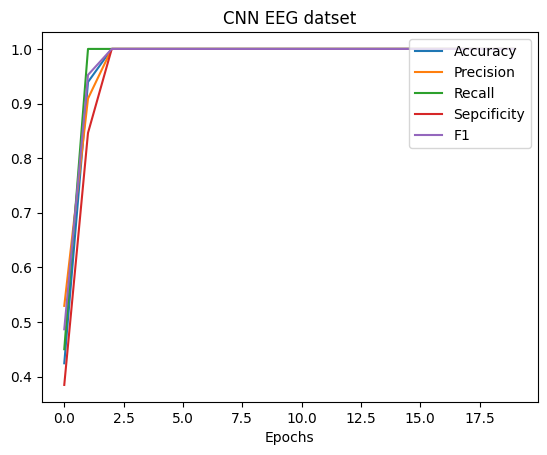

In [351]:
plt.plot(all_accuracy, label="Accuracy")
plt.plot(all_precision, label="Precision")
plt.plot(all_recall, label="Recall")
plt.plot(all_specificity, label="Sepcificity")
plt.plot(all_f1, label="F1")
plt.title('CNN EEG datset')
plt.xlabel('Epochs')
plt.ylabel('')
plt.legend(loc='upper right')
plt.show()

Evalualtion on training set

In [352]:
model.eval()
y_true_train = []
y_pred_train = []
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true_train.extend(labels.cpu().numpy())
        y_pred_train.extend(predicted.cpu().numpy())

In [353]:
accuracy = accuracy_score(y_true_train, y_pred_train)
precision = precision_score(y_true_train, y_pred_train)
specificity = recall_score(y_true_train, y_pred_train,pos_label=0)
recall = recall_score(y_true_train, y_pred_train)
f1 = f1_score(y_true_train, y_pred_train)
print('Metrics Training set')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Metrics Training set
Accuracy: 1.00
Precision: 1.00
Specificity: 1.00
Recall: 1.00
F1-Score: 1.00


Evaluation on test set

In [354]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

model.eval()
y_true_test = []
y_pred_test = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true_test.extend(labels.cpu().numpy())
        y_pred_test.extend(predicted.cpu().numpy())

In [355]:
accuracy = accuracy_score(y_true_test, y_pred_test)
precision = precision_score(y_true_test, y_pred_test)
recall = recall_score(y_true_test, y_pred_test)
specificity = recall_score(y_true_test, y_pred_test,pos_label=0)
f1 = f1_score(y_true_test, y_pred_test)
print('Metrics Test set')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Metrics Test set
Accuracy: 0.86
Precision: 0.86
Specificity: 0.00
Recall: 1.00
F1-Score: 0.93


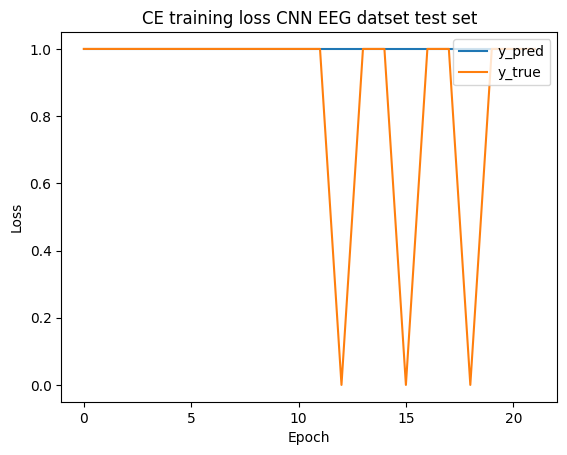

In [356]:
plt.plot(y_pred_test, label="y_pred")
plt.plot(y_true_test, label="y_true")
plt.title('CE training loss CNN EEG datset test set')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Confusion matrix test set

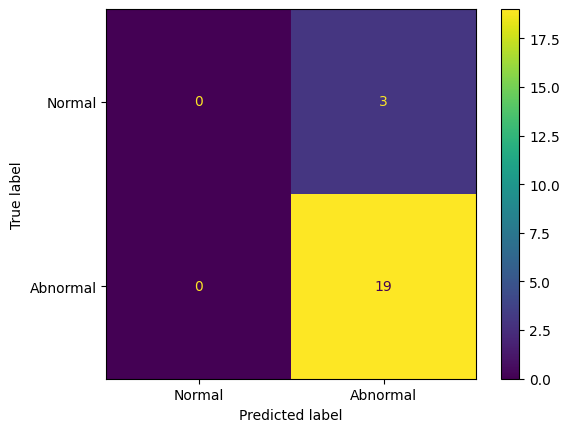

In [357]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_test, y_pred_test, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Normal','Abnormal'])
disp.plot()
plt.show()

Confusion matrix training set

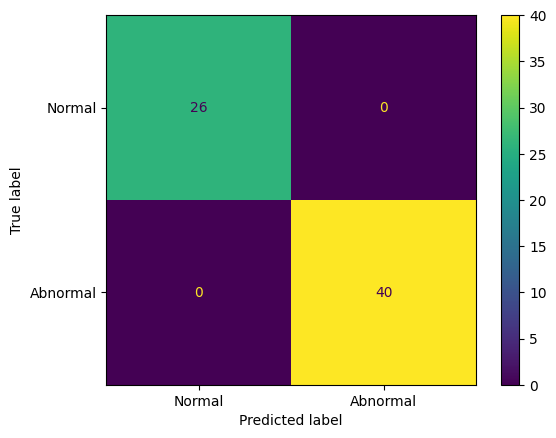

In [358]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_train, y_pred_train, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Normal','Abnormal'])
disp.plot()
plt.show()

#Implementation on RNN-LSTM classifier

In [381]:
import torch
import torch.nn as nn
#Declaring the model for RNN
class EEGClassifierRNN(nn.Module):
    def __init__(self, input_channels, hidden_size, output_classes):
        super(EEGClassifierRNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(input_channels, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2)
        )

        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(input_size=64,hidden_size=self.hidden_size,batch_first=True)
        self.fc = nn.Linear(hidden_size, output_classes)


    def forward(self, x):
        x = self.cnn(x)
        batch_size, channels, time_steps = x.shape
        x = x.view(batch_size, time_steps, -1)
        lstm_out, (hidden, _) = self.rnn(x)
        x = self.fc(hidden[-1])
        return x

Declaring the model

In [382]:
#!pip install pysdtw
import pysdtw
torch.cuda.empty_cache()
num_channels = 19
max_rows = max(df.shape[0] for df in liste_de_rats)
model = EEGClassifierRNN(input_channels=num_channels,hidden_size=128, output_classes=2)
#Calculating class weigths
class_counts = np.bincount(y_train.numpy())
print(f"Class counts: {class_counts}")

total_samples = len(y_train)
class_weights = [total_samples / count for count in class_counts]
print(f"Class weights (unnormalized): {class_weights}")
class_weights = [weight / sum(class_weights) for weight in class_weights]
print(f"Normalized class weights: {class_weights}")


class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cpu")


Class counts: [26 40]
Class weights (unnormalized): [2.5384615384615383, 1.65]
Normalized class weights: [0.606060606060606, 0.3939393939393939]


Training loop RNN-LSTM with STFT

In [383]:
import pickle
def squared_euclidean(x, y):
    return torch.cdist(x, y, p=2) ** 2

# save the model to disk
#filename = '/content/drive/MyDrive/CNN_50E_model.pkl'
#model = pickle.load(open(filename, 'rb'))
model=model.to(device)

# Training loop
num_epochs = 25
all_loss = []
model.train()
all_accuracy = []
all_precision = []
all_recall = []
all_specificity = []
all_f1 = []
fun = pysdtw.distance.pairwise_l2_squared
for epoch in range(num_epochs):
    running_loss = 0.0
    temp_loss = []
    y_true_train = []
    y_pred_train = []
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        target = torch.ones_like(inputs).to(device)
        sdtw_loss = []
        for i in range(inputs.size(0)):
            sdtw = pysdtw.SoftDTW(gamma=1.0, dist_func=squared_euclidean, use_cuda=False)
            sample_input = inputs[i].unsqueeze(0).cpu()
            sample_target = target[i].unsqueeze(0).cpu()
            sdtw_result = sdtw(sample_input, sample_target)
            sdtw_loss.append(sdtw_result.clone().detach().to(device))

        sdtw_loss = torch.stack(sdtw_loss).mean()

        optimizer.zero_grad()
        # Forward pass
        outputs = model.forward(inputs)

        loss = criterion(outputs, labels)+0.75*sdtw_loss
        _, predicted = torch.max(outputs, 1)
        y_true_train.extend(labels.cpu().numpy())
        y_pred_train.extend(predicted.cpu().numpy())
        # Backward pass
        loss.backward()
        optimizer.step()
        temp_loss.append(loss.item())
        running_loss += loss.item()

    all_accuracy.append(accuracy_score(y_true_train, y_pred_train))
    all_precision.append(precision_score(y_true_train, y_pred_train))
    all_recall.append(recall_score(y_true_train, y_pred_train))
    all_specificity.append(recall_score(y_true_train, y_pred_train,pos_label=0))
    all_f1.append(f1_score(y_true_train, y_pred_train))
    all_loss.append(np.mean(temp_loss))

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/25], Loss: 18260086.6667
Epoch [2/25], Loss: 18260086.6667
Epoch [3/25], Loss: 18260086.6667
Epoch [4/25], Loss: 18260086.6667
Epoch [5/25], Loss: 18260086.6667
Epoch [6/25], Loss: 18260086.6667
Epoch [7/25], Loss: 18260086.6667
Epoch [8/25], Loss: 18260086.6667
Epoch [9/25], Loss: 18260086.6667
Epoch [10/25], Loss: 18260086.6667
Epoch [11/25], Loss: 18260086.6667
Epoch [12/25], Loss: 18260086.6667
Epoch [13/25], Loss: 18260086.6667
Epoch [14/25], Loss: 18260086.6667
Epoch [15/25], Loss: 18260086.6667
Epoch [16/25], Loss: 18260086.6667
Epoch [17/25], Loss: 18260086.6667
Epoch [18/25], Loss: 18260086.6667
Epoch [19/25], Loss: 18260086.6667
Epoch [20/25], Loss: 18260086.6667
Epoch [21/25], Loss: 18260086.6667
Epoch [22/25], Loss: 18260086.6667
Epoch [23/25], Loss: 18260086.6667
Epoch [24/25], Loss: 18260086.6667
Epoch [25/25], Loss: 18260086.6667


In [384]:
import pickle
# save the model to disk
filename = '/content/drive/MyDrive/RNN-LSTM_25E_STFT_LOG1P_DTW25_Loss_model_upsampling.pkl'
pickle.dump(model, open(filename, 'wb'))

Plotting the Loss

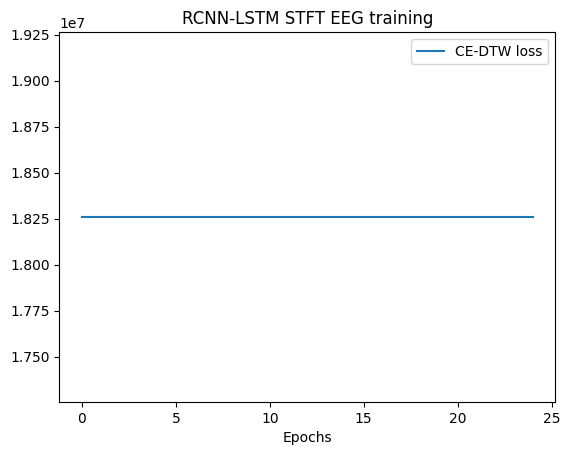

In [385]:
plt.plot(all_loss, label="CE-DTW loss")
plt.title('RCNN-LSTM STFT EEG training')
plt.xlabel('Epochs')
plt.ylabel('')
plt.legend(loc='upper right')
plt.show()

Plotting the metrics

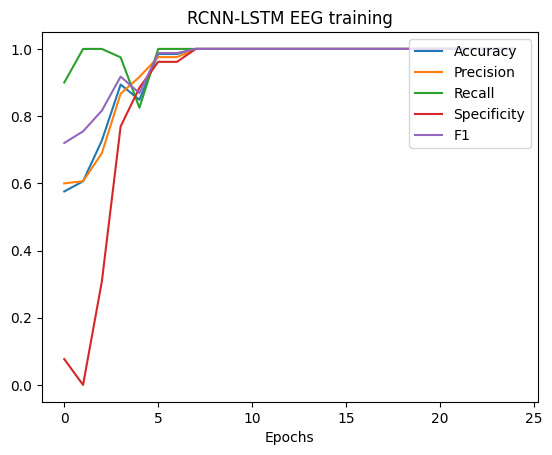

In [386]:
plt.plot(all_accuracy, label="Accuracy")
plt.plot(all_precision, label="Precision")
plt.plot(all_recall, label="Recall")
plt.plot(all_specificity, label="Specificity")
plt.plot(all_f1, label="F1")
plt.title('RCNN-LSTM EEG training')
plt.xlabel('Epochs')
plt.ylabel('')
plt.legend(loc='upper right')
plt.show()

Evaluation on training set

In [389]:
model.eval()
y_true_train = []
y_pred_train = []
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true_train.extend(labels.cpu().numpy())
        y_pred_train.extend(predicted.cpu().numpy())

In [390]:
accuracy = accuracy_score(y_true_train, y_pred_train)
precision = precision_score(y_true_train, y_pred_train)
recall = recall_score(y_true_train, y_pred_train)
specificity = recall_score(y_true_train, y_pred_train, pos_label=0)
f1 = f1_score(y_true_train, y_pred_train)
print('Metrics Training set')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

Metrics Training set
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Specificity: 1.00


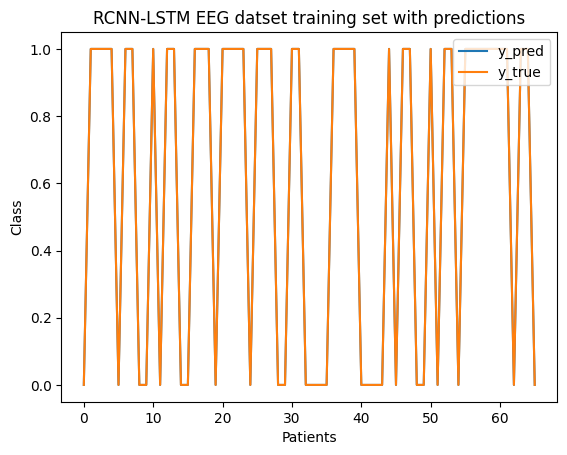

In [391]:
plt.plot(y_pred_train, label="y_pred")
plt.plot(y_true_train, label="y_true")
plt.title('RCNN-LSTM EEG datset training set with predictions')
plt.xlabel('Patients')
plt.ylabel('Class')
plt.legend(loc='upper right')
plt.show()

Evaluation on test set

In [393]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

model.eval()
y_true_test = []
y_pred_test = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true_test.extend(labels.cpu().numpy())
        y_pred_test.extend(predicted.cpu().numpy())

In [394]:
accuracy = accuracy_score(y_true_test, y_pred_test)
precision = precision_score(y_true_test, y_pred_test)
recall = recall_score(y_true_test, y_pred_test)
specificity = recall_score(y_true_test, y_pred_test, pos_label=0)
f1 = f1_score(y_true_test, y_pred_test)
print('Metrics Test set')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

Metrics Test set
Accuracy: 0.73
Precision: 0.88
Recall: 0.79
F1-Score: 0.83
Specificity: 0.33


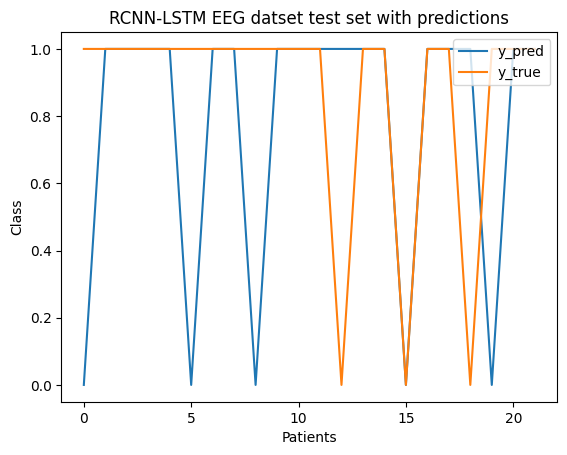

In [395]:
plt.plot(y_pred_test, label="y_pred")
plt.plot(y_true_test, label="y_true")
plt.title('RCNN-LSTM EEG datset test set with predictions')
plt.xlabel('Patients')
plt.ylabel('Class')
plt.legend(loc='upper right')
plt.show()

Confusion matrix test set

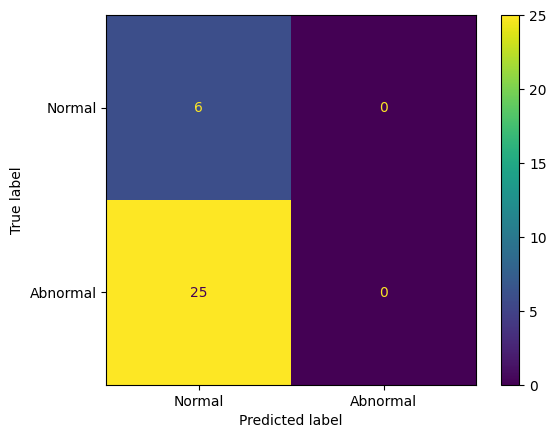

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_test, y_pred_test, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Normal','Abnormal'])
disp.plot()
plt.show()

Confusion matrix training set

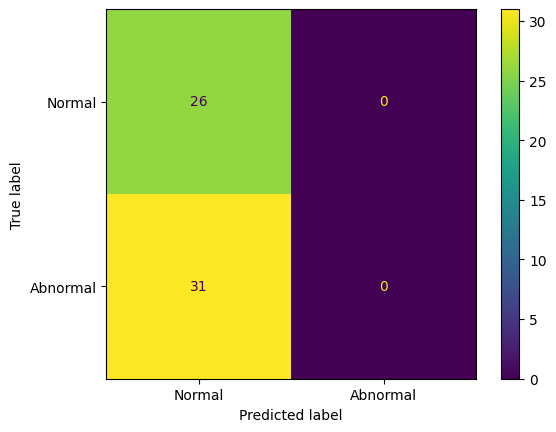

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_train, y_pred_train, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Normal','Abnormal'])
disp.plot()
plt.show()

#Implementation of a CNN classifier on the 3 original classes

In [403]:
participants_data['Class_norm_anorm']= participants_data['Group'].replace({'C': 0, 'A': 1, 'F': 2})

<ipython-input-403-e1dbee0b484d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  participants_data['Class_norm_anorm']= participants_data['Group'].replace({'C': 0, 'A': 1, 'F': 2})


Preparaing the dataset and the dataloader

In [404]:
labels = torch.tensor(participants_data['Class_norm_anorm'][:len(dataset_scaled)], dtype=torch.long)
X_train, X_test, y_train, y_test = train_test_split(dataset_scaled, labels, test_size=0.25, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(
    TensorDataset(X_train, y_train),
    batch_size=8,
    pin_memory=True
)

test_loader = DataLoader(
    TensorDataset(X_test, y_test),
    batch_size=8,
    shuffle=False
)

<ipython-input-404-9f498c0c1e29>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
<ipython-input-404-9f498c0c1e29>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)


Specificity calculation

In [405]:
def compute_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    num_classes = cm.shape[0]
    specificity_per_class = []

    for i in range(num_classes):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
        specificity_per_class.append(specificity)

    return specificity_per_class

Training loop

In [406]:
import pickle
torch.cuda.empty_cache()
max_rows = max(df.shape[0] for df in liste_de_rats)
num_channels = 19
freq_bins = 64
time_frames = 32
device = torch.device("cpu")
num_classes = 3
def squared_euclidean(x, y):
    return torch.cdist(x, y, p=2) ** 2

#filename = '/content/drive/MyDrive/CNN_50E_model.pkl'
#model = pickle.load(open(filename, 'rb'))
model = EEGClassifier(num_channels=num_channels, max_rows=max_rows,num_classes=num_classes)
model=model.to(device)

class_counts = np.bincount(y_train.numpy())
print(f"Class counts: {class_counts}")

total_samples = len(y_train)
class_weights = [total_samples / count for count in class_counts]
print(f"Class weights (unnormalized): {class_weights}")

class_weights = [weight / sum(class_weights) for weight in class_weights]
print(f"Normalized class weights: {class_weights}")

class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 30
all_loss = []
model.train()
all_accuracy = []
all_precision = []
all_recall = []
all_specificity = []
all_f1 = []

for epoch in range(num_epochs):
    running_loss = 0.0
    temp_loss = []
    y_true_train = []
    y_pred_train = []
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        inputs = inputs.to(device)
        labels = labels.to(device)


        target = torch.ones_like(inputs).to(device)

        sdtw_loss = []
        for i in range(inputs.size(0)):
            sdtw = pysdtw.SoftDTW(gamma=1.0, dist_func=squared_euclidean, use_cuda=False)
            sample_input = inputs[i].unsqueeze(0).cpu()
            sample_target = target[i].unsqueeze(0).cpu()

            sdtw_result = sdtw(sample_input, sample_target)
            sdtw_loss.append(sdtw_result.clone().detach().to(device))

        sdtw_loss = torch.stack(sdtw_loss).mean()

        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs, 1)
        y_true_train.extend(labels.cpu().numpy())
        y_pred_train.extend(predicted.cpu().numpy())
        # Backward pass
        loss.backward()
        optimizer.step()
        temp_loss.append(loss.item())
        running_loss += loss.item()

    all_accuracy.append(accuracy_score(y_true_train, y_pred_train))
    all_precision.append(precision_score(y_true_train, y_pred_train, average='macro'))
    all_recall.append(recall_score(y_true_train, y_pred_train, average='macro'))
    all_f1.append(f1_score(y_true_train, y_pred_train, average='macro'))
    all_specificity.append(compute_specificity(y_true_train, y_pred_train))
    all_loss.append(np.mean(temp_loss))

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

Class counts: [26 26 14]
Class weights (unnormalized): [2.5384615384615383, 2.5384615384615383, 4.714285714285714]
Normalized class weights: [0.25925925925925924, 0.25925925925925924, 0.48148148148148145]
Epoch [1/30], Loss: 1.1091
Epoch [2/30], Loss: 1.0750
Epoch [3/30], Loss: 1.0433
Epoch [4/30], Loss: 1.0022
Epoch [5/30], Loss: 0.9500
Epoch [6/30], Loss: 0.8836
Epoch [7/30], Loss: 0.8006
Epoch [8/30], Loss: 0.6991
Epoch [9/30], Loss: 0.5852
Epoch [10/30], Loss: 0.4573
Epoch [11/30], Loss: 0.3356
Epoch [12/30], Loss: 0.2275
Epoch [13/30], Loss: 0.1485
Epoch [14/30], Loss: 0.0950
Epoch [15/30], Loss: 0.0627
Epoch [16/30], Loss: 0.0435
Epoch [17/30], Loss: 0.0317
Epoch [18/30], Loss: 0.0243
Epoch [19/30], Loss: 0.0193
Epoch [20/30], Loss: 0.0158
Epoch [21/30], Loss: 0.0133
Epoch [22/30], Loss: 0.0114
Epoch [23/30], Loss: 0.0099
Epoch [24/30], Loss: 0.0086
Epoch [25/30], Loss: 0.0077
Epoch [26/30], Loss: 0.0068
Epoch [27/30], Loss: 0.0062
Epoch [28/30], Loss: 0.0056
Epoch [29/30], Loss:

In [407]:
import pickle
# save the model to disk
filename = '/content/drive/MyDrive/CNN_30E_DTW25_Loss_model_upsampling.pkl'
pickle.dump(model, open(filename, 'wb'))

In [396]:
filename = '/content/drive/MyDrive/CNN_50E_DTW25_Loss_model_upsampling.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

Plotting the loss

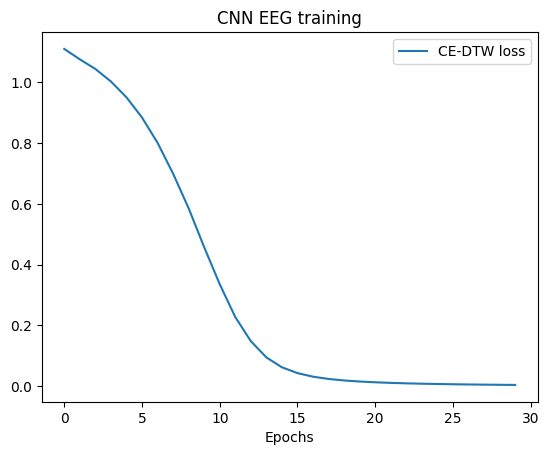

In [408]:
plt.plot(all_loss, label="CE-DTW loss")
plt.title('CNN EEG training')
plt.xlabel('Epochs')
plt.ylabel('')
plt.legend(loc='upper right')
plt.show()

Plotting the metrics

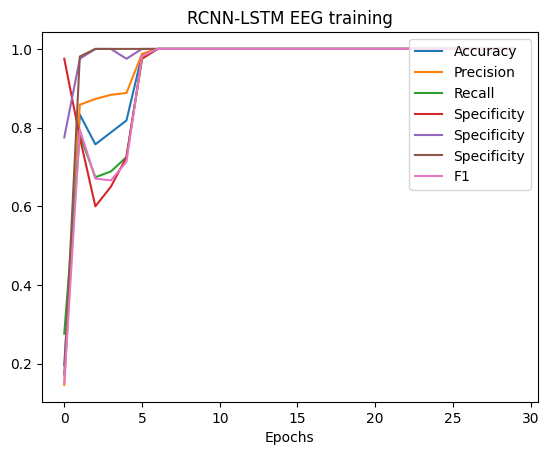

In [409]:
plt.plot(all_accuracy, label="Accuracy")
plt.plot(all_precision, label="Precision")
plt.plot(all_recall, label="Recall")
plt.plot(all_specificity, label="Specificity")
plt.plot(all_f1, label="F1")
plt.title('RCNN-LSTM EEG training')
plt.xlabel('Epochs')
plt.ylabel('')
plt.legend(loc='upper right')
plt.show()

Evaluation on the training set

In [410]:
model.eval()
y_true_train = []
y_pred_train = []
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true_train.extend(labels.cpu().numpy())
        y_pred_train.extend(predicted.cpu().numpy())

accuracy = accuracy_score(y_true_train, y_pred_train)
precision = precision_score(y_true_train, y_pred_train, average='macro')
recall = recall_score(y_true_train, y_pred_train, average='macro')
specificity = compute_specificity(y_true_train, y_pred_train)
f1 = f1_score(y_true_train, y_pred_train, average='macro')
print('Metrics Training set')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Specificity: {[f'{s:.2f}' for s in specificity]}")

Metrics Training set
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Specificity: ['1.00', '1.00', '1.00']


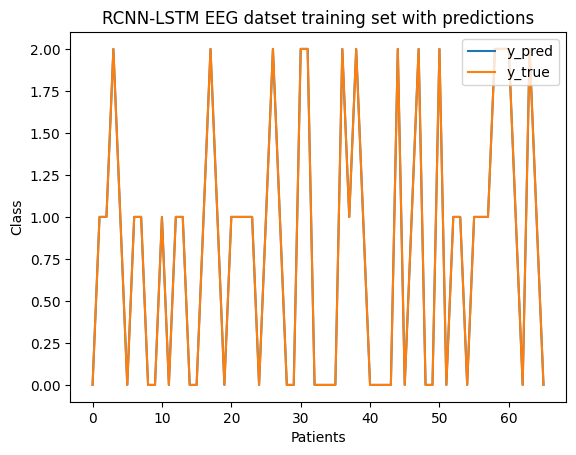

In [411]:
plt.plot(y_pred_train, label="y_pred")
plt.plot(y_true_train, label="y_true")
plt.title('RCNN-LSTM EEG datset training set with predictions')
plt.xlabel('Patients')
plt.ylabel('Class')
plt.legend(loc='upper right')
plt.show()

Evaluation on the test set

In [412]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

model.eval()
y_true_test = []
y_pred_test = []
with torch.no_grad():
    for inputs, labels in test_loader:

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true_test.extend(labels.cpu().numpy())
        y_pred_test.extend(predicted.cpu().numpy())

accuracy = accuracy_score(y_true_test, y_pred_test)
precision = precision_score(y_true_test, y_pred_test, average='macro')
recall = recall_score(y_true_test, y_pred_test, average='macro')
specificity = compute_specificity(y_true_test, y_pred_test)
f1 = f1_score(y_true_test, y_pred_test, average='macro')
print('Metrics Test set')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Specificity: {[f'{s:.2f}' for s in specificity]}")

Metrics Test set
Accuracy: 0.27
Precision: 0.15
Recall: 0.20
F1-Score: 0.17
Specificity: ['0.53', '0.42', '1.00']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


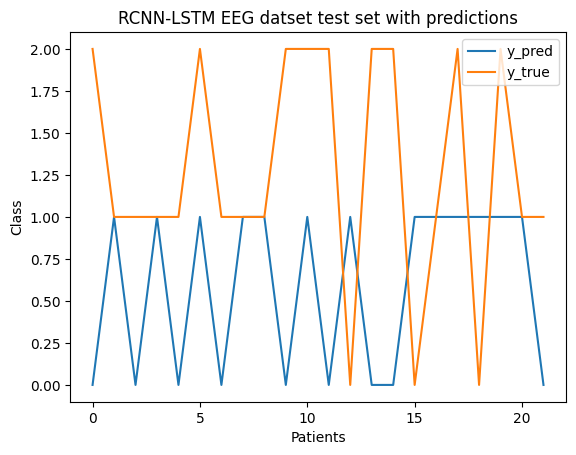

In [413]:
plt.plot(y_pred_test, label="y_pred")
plt.plot(y_true_test, label="y_true")
plt.title('RCNN-LSTM EEG datset test set with predictions')
plt.xlabel('Patients')
plt.ylabel('Class')
plt.legend(loc='upper right')
plt.show()

Confusion matrix on the test set

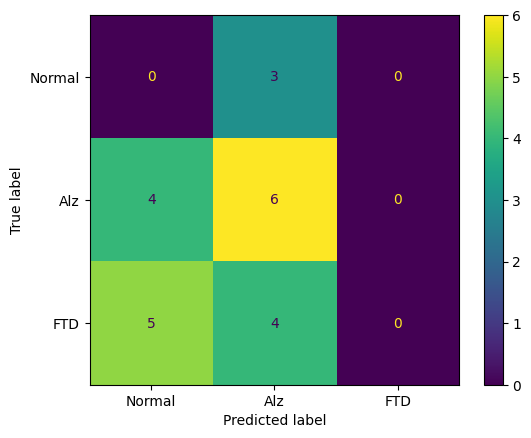

In [415]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_test, y_pred_test, labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Normal','Alz','FTD'])
disp.plot()
plt.show()

Confusion matrix on the training set

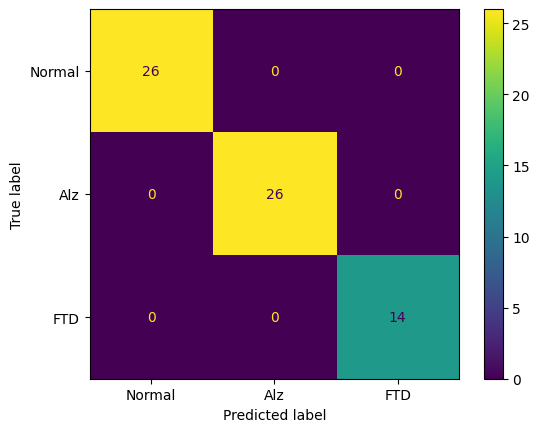

In [416]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true_train, y_pred_train, labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Normal','Alz','FTD'])
disp.plot()
plt.show()